#**BBC News Text Classification – NLP Project**



## **Objective**
Build an end-to-end Natural Language Processing (NLP) pipeline to classify BBC news articles into categories using TF-IDF and Machine Learning models.

## **Dataset**
BBC News Dataset (Business, Entertainment, Politics, Sport, Tech)

## **Author**
Karthik Kumar Honnapura Umashankar


# **Import Libaries**

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

 # **Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv("/content/BBC_News_processed.csv")

# Display first rows
df.head()


,Unnamed: 0,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


# **Exploratory Data Analysis (EDA)**


In [3]:
# Dataset shape
df.shape



(1490, 7)

In [4]:
# Check missing values
df.isnull().sum()


,0
Unnamed: 0,0
ArticleId,0
Text,0
Category,0
News_length,0
Text_parsed,0
Category_target,0


In [6]:
 # Class distribution
df['Category'].value_counts()

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


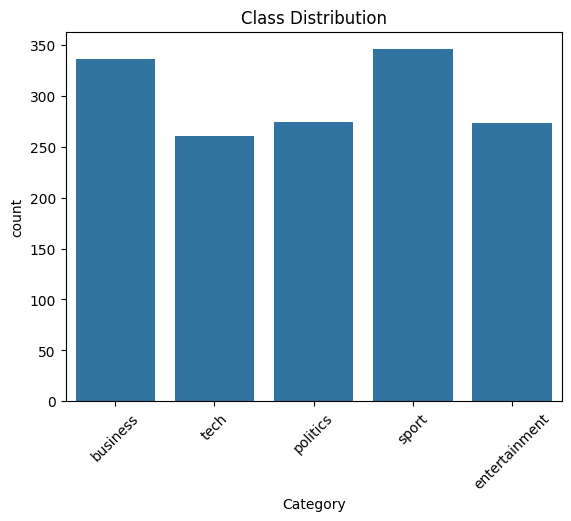

In [8]:
# Visualize class distribution
plt.figure()
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

# **Text Preprocessing**

## Preprocessing Function

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


# **Apply Cleaning**

In [11]:
df['clean_text'] = df['Text'].apply(clean_text)
df[['Text', 'clean_text']].head()

,Text,clean_text
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launch defence lawyer defendin...
1,german business confidence slides german busin...,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,enron boss payout eighteen former enron direct...


# **Feature Engineering using TF-IDF**

##TF-IDF (Term Frequency–Inverse Document Frequency) converts text into numerical features by measuring word importance across documents.

# **Train-Test Split**

In [13]:
# Features and target
X = df['clean_text']
y = df['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((1192,), (298,))

# **TF-IDF Vectorizer**

In [14]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

# Fit on training data, transform both
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape


(1192, 5000)

# **Model Training and Evaluation**

##We train and compare multiple machine learning classifiers:
- Multinomial Naive Bayes
- Logistic Regression
- Support Vector Machine (LinearSVC)

# **Naive Bayes**

In [15]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9798657718120806
               precision    recall  f1-score   support

     business       0.97      0.97      0.97        67
entertainment       1.00      1.00      1.00        55
     politics       0.96      0.95      0.95        55
        sport       1.00      1.00      1.00        69
         tech       0.96      0.98      0.97        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



# **Logistic Regression**

In [16]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9731543624161074
               precision    recall  f1-score   support

     business       0.94      0.99      0.96        67
entertainment       0.98      1.00      0.99        55
     politics       0.98      0.95      0.96        55
        sport       1.00      1.00      1.00        69
         tech       0.96      0.92      0.94        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



# **Support Vector Machine**

In [17]:
# Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9765100671140939
               precision    recall  f1-score   support

     business       0.97      0.97      0.97        67
entertainment       0.98      1.00      0.99        55
     politics       0.98      0.95      0.96        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.96      0.96        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



#**Model Comparison Summary**

##**We compare models based on accuracy and classification metrics to select the best-performing classifier.**


##**Comparison Table**

In [18]:
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm)
    ]
})

results


,Model,Accuracy
0,Naive Bayes,0.979866
1,Logistic Regression,0.973154
2,SVM,0.976510


#  **Confusion Matrix (Best Model – SVM)**

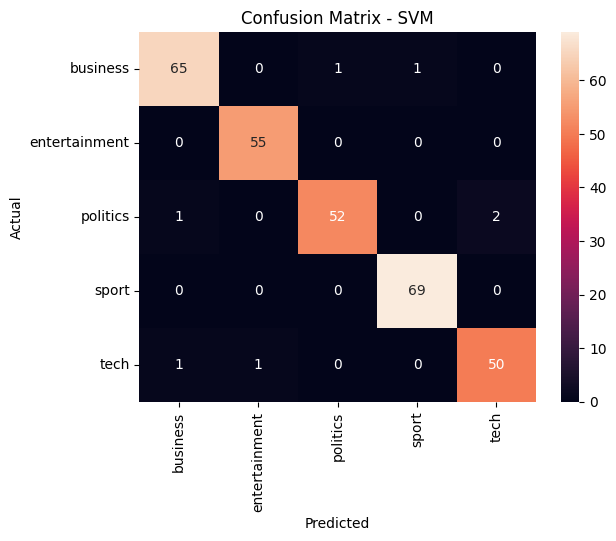

In [19]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()
